<a href="https://colab.research.google.com/github/RogerCL24/ANN/blob/main/FirstDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA CLEANING**


In [ ]:
 # libreria para leer y manipular datos

 import numpy as np
 import pandas as pd

In [ ]:
# librerias para machine learning

import sklearn
from sklearn.model_selection import train_test_split


In [ ]:
# librerias para las graficas

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [ ]:
# los datos se cargaran en variable

df_original = pd.read_csv("train.csv")  # cargar archivo train.csv antes

In [ ]:
# visualizar información

df_original.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# drop algunas columnas -> según las características que no son relevantes

df_dropped_features = df_original.drop(["PassengerId","Name","Embarked","Parch","Cabin"],axis = 1)

# visualizamos el mismo data frame pero más "limpio"
df_dropped_features.head(5)


,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare
0,0,3,male,22.0,1,A/5 21171,7.2500
1,1,1,female,38.0,1,PC 17599,71.2833
2,1,3,female,26.0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,113803,53.1000
4,0,3,male,35.0,0,373450,8.0500


In [ ]:
# vemos los diferentes valores del feature Sex

print("Sexo: ", df_dropped_features["Sex"].unique())

Sexo:  ['male' 'female']


In [ ]:
  # con get_dummies de panda, se categoriza los diferentes features
  df_categorized = pd.get_dummies(df_dropped_features)

  # visualizar la informacion
  df_categorized.head(5)

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,0,3,22.0,1,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# veamos más
df_categorized.describe()

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208,0.352413,0.647587,0.003367,0.003367,0.002245,...,0.001122,0.001122,0.001122,0.001122,0.002245,0.004489,0.001122,0.001122,0.001122,0.002245
std,0.486592,0.836071,14.526497,1.102743,49.693429,0.477990,0.477990,0.057961,0.057961,0.047351,...,0.033501,0.033501,0.033501,0.033501,0.047351,0.066890,0.033501,0.033501,0.033501,0.047351
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# copia de todo el dataset
df_cleaned = df_categorized.copy()

#eliminamos filas con valores NAN para edad
df_cleaned = df_categorized.dropna(axis=0)

In [ ]:
# auxiliar para hacer el gráfico

def plot_with_bar(values = None, title = None, xticks = None):
  # Assertions
  if (values == None):
    raise ValueError("Values can not be empty.")
  if (type(values) == list) or (type(values) == tuple):
    pass
  else:
    raise TypeError("Values must be a list or a tuple.")
  ind = [i for i in range (len(values))]
  plt.bar(ind,values)
  plt.title(title)
  plt.xticks(ind, xticks)
  plt.show()

Cantidad de hombres:  453
Cantidad de mujeres:  261
Cantidad total de pasajeros:  891


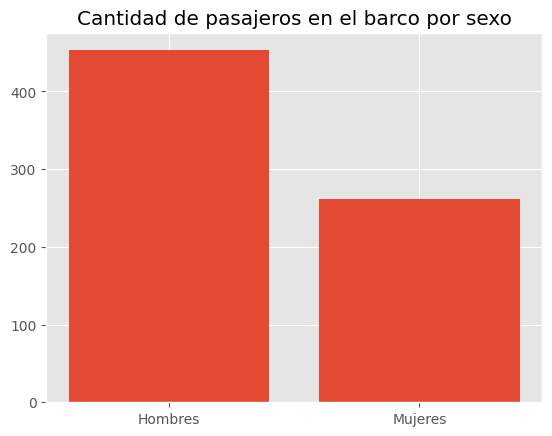

In [ ]:
# hombres/mujeres entre los tripulantes
male = df_cleaned.query("Sex_male == 1")
female = df_cleaned.query("Sex_female == 1")

print("Cantidad de hombres: ", male.shape[0])
print("Cantidad de mujeres: ", female.shape[0])
print("Cantidad total de pasajeros: ", df_original.shape[0])

 # graficando en un bar plot
plot_with_bar(values = [male.shape[0], female.shape[0]],
               title = "Cantidad de pasajeros en el barco por sexo",
               xticks = ["Hombres", "Mujeres"])

## **MACHINE LEARNING**

In [ ]:
Y = df_cleaned["Survived"]
X = df_cleaned.drop("Survived", axis =  1)

print(X.shape, Y.shape)

(714, 687) (714,)


In [ ]:
# Proporcion % de la data para cada parte (training & testing/validation)
TRAIN_SIZE = 0.7
VALIDATION_SIZE = 0.3

x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=TRAIN_SIZE, random_state=42)
print("Tamaños train set: ", x_train.shape, y_train.shape)
print("Tamaños validation set: ", x_validation.shape, y_validation.shape)

Tamaños train set:  (214, 687) (214,)
Tamaños validation set:  (500, 687) (500,)


In [ ]:
# import Random Forest
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 43, max_depth = 21)
modelo.fit(x_train, y_train) # training

RandomForestClassifier(max_depth=21, n_estimators=43)

In [ ]:
# validamos con la maquina ya entrenada

print("Score en training set: ", modelo.score(x_train, y_train)) # datos ya vistos por la maquina
print("Score en validation set: ", modelo.score(x_validation, y_validation)) # datos nuevos

# si el score es aceptable pasar a la EVALUACION sino cambiar el valor de 'n_estimators' y 'max_depth' hasta conseguir el score deseado(entrenar y entrenar :) )

Score en training set:  0.9532710280373832
Score en validation set:  0.806


# **EVALUACIÓN**

## Limpieza de el validation test

In [ ]:
df_original_2 = pd.read_csv("test.csv")

df_dropped_features_2 = df_original_2.drop(["PassengerId","Name","Embarked","Parch","Cabin"],axis = 1)
df_categorized_2 = pd.get_dummies(df_dropped_features_2)
df_cleaned_2 = df_categorized_2.dropna(axis=0)

## Validation

In [ ]:
B = df_cleaned_2["Survived"]
A = df_cleaned_2.drop("Survived", axis =  1)

print(A.shape, B.shape)

KeyError: ignored